# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress 


In [2]:
# Import API key
from api_keys import weather_api_key
from api_keys import g_key


In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)

612


In [6]:
world_cities = pd.DataFrame(cities)
world_cities.head()

,0
0,sol-iletsk
1,okha
2,taolanaro
3,ahipara
4,belushya guba


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
base_url="http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key
city = "moscow"
full_url = base_url+"&q="+city
response = requests.get(full_url).json()
response

{'coord': {'lon': 37.6156, 'lat': 55.7522},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 26.98,
  'feels_like': 18.86,
  'temp_min': 26.15,
  'temp_max': 27.12,
  'pressure': 1002,
  'humidity': 95,
  'sea_level': 1002,
  'grnd_level': 983},
 'visibility': 5991,
 'wind': {'speed': 7.81, 'deg': 206, 'gust': 21.99},
 'snow': {'1h': 0.56},
 'clouds': {'all': 95},
 'dt': 1643758729,
 'sys': {'type': 1,
  'id': 9027,
  'country': 'RU',
  'sunrise': 1643779322,
  'sunset': 1643810659},
 'timezone': 10800,
 'id': 524901,
 'name': 'Moscow',
 'cod': 200}

In [8]:
Temp = response['main']['temp_max']
print(Temp)

27.12


In [9]:
Temp_C = round((Temp-32)/1.8,2)
print(Temp_C)

-2.71


In [ ]:
Humidity = response['main']['humidity']
print(Humidity)

In [ ]:
Clouds = response['clouds']['all']
print(Clouds)

In [ ]:
Wind_Speed = response['wind']['speed']
print(Wind_Speed)

In [ ]:
Date = response['dt']
print(Date)

In [ ]:
Country = response['sys']['country']
print(Country)

In [ ]:
Latitude = response['coord']['lat']
print(Latitude)

In [ ]:
Longitude = response['coord']['lon']
print(Longitude)

In [ ]:
response.keys()
response

In [ ]:
weather_Moscow = {"Temperature(F)": Temp, "Temperature(C)": Temp_C, "Humidity": Humidity, "Cloudiness": Clouds, "Wind Speed": Wind_Speed,
                 "Country": Country, "Date": Date, "Longitude": Longitude, "Latitude": Latitude}
weather_Moscow

In [10]:
# Loop through the list of cities and perform a request for data on each
weather_py = []

base_url="http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key

for city in cities:
   # time.sleep(60)
    try:
        full_url = base_url+"&q="+city
        response = requests.get(full_url).json()
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']    
        date = response['dt']
        longitude = response['coord']['lon']
        latitude = response['coord']['lat']
        weather_dict = {"City": city, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "wind_speed": wind_speed,
                        "Date": date,"Country": country,  "Country": country,  "Longitude": longitude, "Latitude": latitude}
        weather_py.append(weather_dict)   
        print(city + " found") 
    except:
        print("City not found. Skipping..") 

#{'cod': 429, 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type.} 
#{Please choose the proper subscription http://openweathermap.org/price'}        

sol-iletsk found
okha found
City not found. Skipping..
ahipara found
City not found. Skipping..
rikitea found
hobart found
hermanus found
alta floresta found
kumla found
vaini found
nuuk found
ushuaia found
saskylakh found
qaanaaq found
butaritari found
bereda found
tahoua found
hokitika found
kodiak found
gharghoda found
City not found. Skipping..
carnarvon found
solnechnyy found
hilo found
bredasdorp found
mormugao found
erenhot found
yelovo found
upernavik found
City not found. Skipping..
bambous virieux found
henties bay found
gouyave found
keti bandar found
mawlaik found
kaitangata found
saint george found
coihaique found
katherine found
chuy found
kosh-agach found
bluff found
touros found
punta arenas found
cape town found
saint-georges found
meadow lake found
sao filipe found
cayenne found
avarua found
exu found
jamestown found
vila franca do campo found
ponta do sol found
busselton found
luderitz found
cherskiy found
hithadhoo found
weymouth found
thompson found
arraial do cabo

hailar found
mahanoro found
pontes e lacerda found
altay found
anadyr found
bosaso found
saint joseph found
mitu found
pisco found
lamu found
natal found
qasigiannguit found
khorol found
ikalamavony found
mackenzie found
lebedinyy found
port blair found
zhaotong found
salalah found
kiama found
tumaco found
clifton found
jutai found
marsh harbour found
City not found. Skipping..
cotonou found
nanortalik found
tiznit found
zomba found
banjar found
tagusao found
yar-sale found
el alto found
tuskegee found
saint-pierre found
mazarron found
ravne found
kalmunai found
flinders found
helong found
City not found. Skipping..
City not found. Skipping..
coquimbo found
bosconia found
itoman found
chanika found
linda found
candido mendes found
chengde found
southbridge found
City not found. Skipping..
neiafu found
lagoa found
hudson bay found
geraldton found
segou found
aykhal found
katobu found
mosquera found
macas found
lowicz found
imbituba found
balozi found
pacific grove found
kungurtug found


In [11]:
city_weather= pd.DataFrame(weather_py)
city_weather.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,sol-iletsk,28.92,98,100,9.86,1643759269,RU,54.9918,51.1631
1,okha,1.08,90,92,21.09,1643759270,RU,142.9478,53.5739
2,ahipara,75.79,65,100,15.66,1643759270,NZ,173.1667,-35.1667
3,rikitea,78.22,70,89,6.04,1643759072,PF,-134.9692,-23.1203
4,hobart,58.69,47,75,1.99,1643759197,AU,147.3294,-42.8794


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_weather.to_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#  Get the indices of cities that have humidity over 100%.
city_weather[city_weather["Humidity"]> 100]. index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

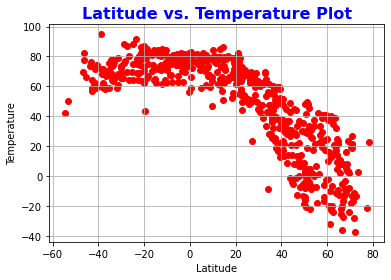

In [16]:


plt.scatter(city_weather["Latitude"], city_weather["Temperature"], marker = "o", facecolors = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot", fontsize = 16, fontweight = "bold", color = "blue")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

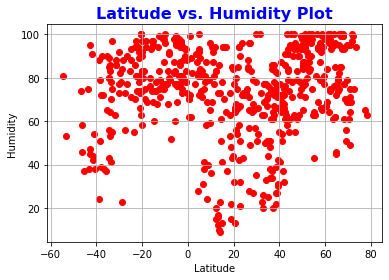

In [17]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker = "o", facecolors = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot", fontsize = 16, fontweight = "bold", color = "blue")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

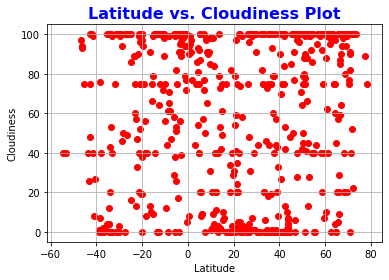

In [18]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], marker = "o", facecolors = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot", fontsize = 16, fontweight = "bold", color = "blue")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

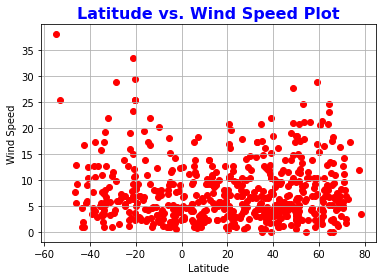

In [19]:
plt.scatter(city_weather["Latitude"], city_weather["wind_speed"], marker = "o", facecolors = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot", fontsize = 16, fontweight = "bold", color = "blue")
plt.grid()
plt.show()

In [37]:
from scipy.stats import linregress

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,sol-iletsk,28.92,98,100,9.86,1643759269,RU,54.9918,51.1631
1,okha,1.08,90,92,21.09,1643759270,RU,142.9478,53.5739
7,kumla,24.26,80,75,10.36,1643759271,SE,15.1434,59.1277
9,nuuk,9.21,85,75,8.05,1643759271,GL,-51.7216,64.1835
11,saskylakh,-28.10,100,52,1.77,1643759272,RU,114.0833,71.9167
...,...,...,...,...,...,...,...,...,...
555,juneau,23.14,66,100,6.91,1643759404,US,-134.4197,58.3019
557,guerrero negro,62.46,65,99,14.03,1643759327,MX,-114.0611,27.9769
559,vostok,-1.44,94,100,4.14,1643759405,RU,135.8833,46.4856
561,lalganj,48.15,75,0,3.20,1643759405,IN,85.1833,25.8667


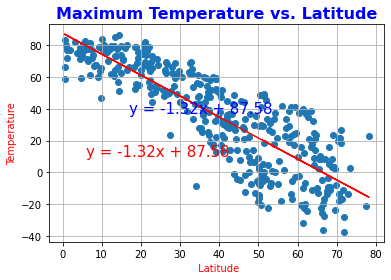

In [45]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Temperature', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Maximum Temperature vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear')
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
2,ahipara,75.79,65,100,15.66,1643759270,NZ,173.1667,-35.1667
3,rikitea,78.22,70,89,6.04,1643759072,PF,-134.9692,-23.1203
4,hobart,58.69,47,75,1.99,1643759197,AU,147.3294,-42.8794
5,hermanus,68.90,80,12,5.23,1643759270,ZA,19.2345,-34.4187
6,alta floresta,70.63,96,56,1.90,1643759271,BR,-56.0861,-9.8756


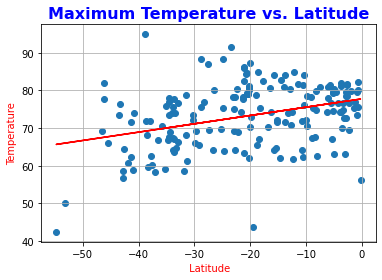

In [47]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Temperature', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Maximum Temperature vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('scatter_linear')
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [48]:
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

,City,Temperature,Humidity,Cloudiness,wind_speed,Date,Country,Longitude,Latitude
0,sol-iletsk,28.92,98,100,9.86,1643759269,RU,54.9918,51.1631
1,okha,1.08,90,92,21.09,1643759270,RU,142.9478,53.5739
7,kumla,24.26,80,75,10.36,1643759271,SE,15.1434,59.1277
9,nuuk,9.21,85,75,8.05,1643759271,GL,-51.7216,64.1835
11,saskylakh,-28.10,100,52,1.77,1643759272,RU,114.0833,71.9167
...,...,...,...,...,...,...,...,...,...
555,juneau,23.14,66,100,6.91,1643759404,US,-134.4197,58.3019
557,guerrero negro,62.46,65,99,14.03,1643759327,MX,-114.0611,27.9769
559,vostok,-1.44,94,100,4.14,1643759405,RU,135.8833,46.4856
561,lalganj,48.15,75,0,3.20,1643759405,IN,85.1833,25.8667


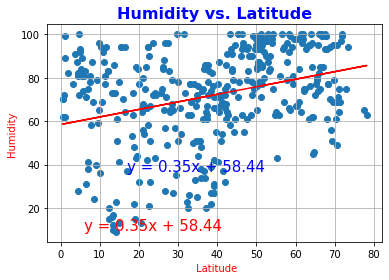

In [54]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

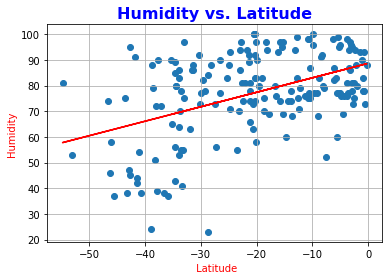

In [56]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

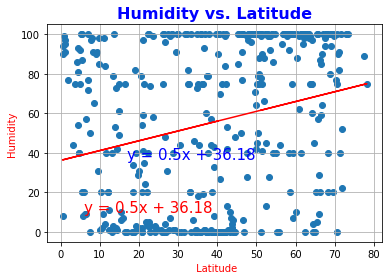

In [57]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

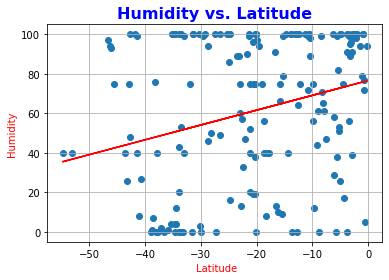

In [58]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
Northern_Hemisphere = city_weather[city_weather["Latitude"]> 0]
Northern_Hemisphere

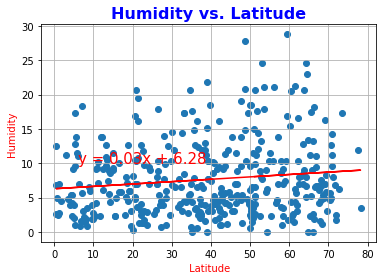

In [59]:
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
Southern_Hemisphere = city_weather[city_weather["Latitude"]<= 0]
Southern_Hemisphere.head()

In [ ]:
corr=st.pearsonr(weight,volume)[0]
print(f"Southern Hemisphere - Wind Speed (mph) vs.Latitude Linear Regression {corr}")

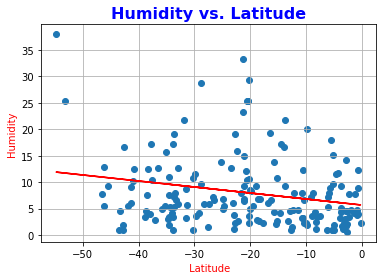

In [60]:
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.scatter(x_values, y_values)
plt.xlabel(' Latitude', color= "red")
plt.ylabel('Humidity', color= "red")

#line = slope*(['Weight (g)'])+ intercept
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(17,37),fontsize=15,color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. Latitude", fontsize = 16, fontweight = "bold", color = "blue")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.show()